In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings('ignore')

**NOTE**: Remove most Visuals and Keep this Book mainly for organizing/cleaning the data and until the "to_csv" part. Make the '...2' notebook for Advanced Analytics & Visuals and A/B Testing, etc. And then so on for ML!
You are provided with historical sales data for 45 stores located in different regions - each store contains a number of departments.

The company also runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of which are the Super Bowl, Labor Day, Thanksgiving, and Christmas.

The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks.

In [ ]:
# Web-Scraping in the Dataset

import requests
from bs4 import BeautifulSoup
from io import StringIO

# Features Dataset - Contains additional data related to the Store, Department, and Regional Activity for the given Dates
response = requests.get('https://raw.githubusercontent.com/alijrizvi/dynamic_pricing_model/refs/heads/main/datasets/Features%20data%20set.csv?token=GHSAT0AAAAAADJQZQS4FZRPK3HBJCDGO36W2G22JRQ')
soup = BeautifulSoup(response.text, 'html.parser')

csv_text = soup.text # Now I have the Actual CSV Content (Comma-Separated)

# Converting to a DataFrame
df = pd.read_csv(StringIO(csv_text), on_bad_lines = 'skip')

df.head(8)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
5,1,12/03/2010,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False
6,1,19/03/2010,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,False
7,1,26/03/2010,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,False


In [ ]:
# Sales Dataset - Contains Historical Sales data (Feb 2010 to Nov 2012)
response = requests.get('https://raw.githubusercontent.com/alijrizvi/dynamic_pricing_model/refs/heads/main/datasets/sales%20data-set.csv?token=GHSAT0AAAAAADJQZQS4AMHKJPXT3X6V6NGM2G22J5A')
soup = BeautifulSoup(response.text, 'html.parser')

csv_text = soup.text # Now I have the Actual CSV Content (Comma-Separated)

# Converting to a DataFrame
df2 = pd.read_csv(StringIO(csv_text), on_bad_lines = 'skip')

df2.head(8)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False
5,1,1,12/03/2010,21043.39,False
6,1,1,19/03/2010,22136.64,False
7,1,1,26/03/2010,26229.21,False


In [ ]:
# Stores Dataset - Contains Anonoymized info about the 45 stores, including the Type and Size of Store
response = requests.get('https://raw.githubusercontent.com/alijrizvi/dynamic_pricing_model/refs/heads/main/datasets/stores%20data-set.csv?token=GHSAT0AAAAAADJQZQS4YQULQHEEVM5PY5RS2G22KHQ')
soup = BeautifulSoup(response.text, 'html.parser')

csv_text = soup.text # Now I have the Actual CSV Content (Comma-Separated)

# Converting to a DataFrame
df3 = pd.read_csv(StringIO(csv_text), on_bad_lines = 'skip')

df3.head(8)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078


In [ ]:
# Finding Common Columns to Join the Datasets by
for i in df.columns:
    if i in df2.columns:
        print(i)

print("")

for i in df.columns:
    if i in df2.columns and i in df3.columns:
        print(i) # = "Store" - this will be the Common Column to Combine the Last (df3) DataFrame too

Store
Date
IsHoliday

Store


In [ ]:
# Merging the First Two DataFrames

# print(df.shape, df2.shape)

merged_df = pd.merge(df, df2, on = ["Store", "Date", "IsHoliday"])
# print(merged_df.shape) # Merged Successfully

merged_df = pd.merge(merged_df, df3, on = ["Store"])
merged_df.head(8) # That, too, Successfully!

# CPI = Consumer Price Index
# Weekly_Sales = Sales for the Given Department in the Given Store
# IsHoliday = Whether the Week is a Special Holiday Week
# MarkDown = Available only after Nov 2011 | MarkDown1 = Initial Promotional Price Cut, MarkDown2 = Higher Price Cut, and so on

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Dept,Weekly_Sales,Type,Size
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,1,24924.50,A,151315
1,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,2,50605.27,A,151315
2,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,3,13740.12,A,151315
3,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,4,39954.04,A,151315
4,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,5,32229.38,A,151315
5,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,6,5749.03,A,151315
6,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,7,21084.08,A,151315
7,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,8,40129.01,A,151315


In [ ]:
merged_df[['Store', 'Dept']] = merged_df[['Store', 'Dept']].astype(object)

In [ ]:
# Let's Easy-fy the Name
df = merged_df.copy()

# sns.boxplot(df['Size'])
# plt.show()

# Introducing Categorical Classifiers for Numeric Values of Store Size(may do more, later)

df['Store_Size_Category'] = pd.qcut(df['Size'], q = 5, labels = ['Small', 'Mid-Size', 'Above Average Size', 'Large', 'Super Store'])
# df.head(8)

### Analyses Along Time Periods

In [ ]:
# Making a Function to Extract out and Label Months of the Year with their Respective Names
def month_maker(month):
    if '01' in month:
        return 'Jan'
    elif '02' in month:
        return 'Feb'
    elif '03' in month:
        return 'Mar'
    elif '04' in month:
        return 'Apr'
    elif '05' in month:
        return 'May'
    elif '06' in month:
        return 'Jun'
    elif '07' in month:
        return 'Jul'
    elif '08' in month:
        return 'Aug'
    elif '09' in month:
        return 'Sep'
    elif '10' in month:
        return 'Oct'
    elif '11' in month:
        return 'Nov'
    elif '12' in month:
        return 'Dec'
    else:
        return 'na'

# NOTE: Could've Used "df['Date'].str.split('/', expand = True)" too but I wanted to Name the Months and use a Function

In [ ]:
# Applying this Function to get our new "Month" Column going
df['Month'] = df['Date'].str[3:5].apply(month_maker)

# "Day" Column for Date of Month Specifically
df['Day of Month'] = df['Date'].str[0:2]

# "Year" Column Specifically, too, for simply Years of Sale
df['Year'] = df['Date'].str[6:]

In [ ]:
# Saving this Merged, Final DataFrame as a CSV file for future usage
# df.to_csv('/Users/alijazibrizvi/Documents/Data Analytics/Project - Dynamic Retail Pricing Model/final_df')

In [ ]:
df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].fillna(0, inplace = True)

p1 = df.pivot_table(index = 'Month', values = 'Weekly_Sales', aggfunc = 'sum')
p2 = df.pivot_table(index = 'Month', values = 'Weekly_Sales', aggfunc = 'mean')
p3 = df.pivot_table(index = 'Month', values = 'Weekly_Sales', aggfunc = 'count')

# JOINing
p = p1.join(p2, lsuffix = '_Sum', rsuffix = '_Mean')
p = p.join(p3, rsuffix = '_Count')

# Ordering by Calendar Year
p.index = pd.CategoricalIndex(p.index, categories = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
                              ordered = True)
p = p.sort_index()

# Feature Engineering: The "Value" Column Signifying Total Revenue Earned per Month
p['Value'] = (p['Weekly_Sales_Sum'] * p['Weekly_Sales']).round(2)
p

,Weekly_Sales_Sum,Weekly_Sales_Mean,Weekly_Sales,Value
Month,,,,
Jan,3.325984e+08,14126.075111,23545,7.831030e+12
Feb,5.687279e+08,16008.779217,35526,2.020463e+13
Mar,5.927859e+08,15416.657597,38451,2.279321e+13
Apr,6.468598e+08,15650.338357,41332,2.673601e+13
May,5.571256e+08,15776.337202,35314,1.967433e+13
Jun,6.226299e+08,16326.137002,38137,2.374524e+13
Jul,6.500010e+08,15861.419650,40980,2.663704e+13
Aug,6.130902e+08,16062.516933,38169,2.340104e+13
Sep,5.787612e+08,15095.886154,38339,2.218912e+13


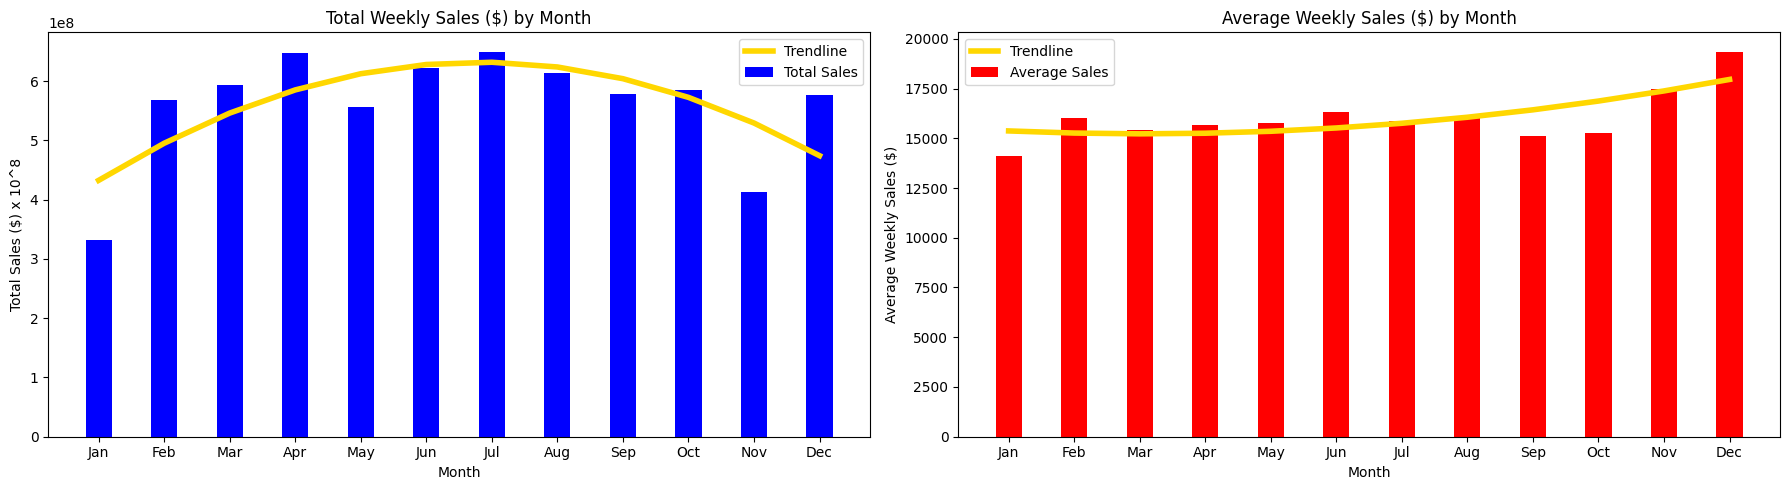

In [ ]:

# Visualizing

plt.figure(figsize = (18, 5))

width = 0.4

# 2-D Curved, Non-Linear Trend line to Model the Changes in the Data
x_num = np.arange(len(p.index))
sum_trend = np.poly1d(np.polyfit(x_num, p['Weekly_Sales_Sum'], 2))
avg_trend = np.poly1d(np.polyfit(x_num, p['Weekly_Sales_Mean'], 2))

# The Bar Charts!

plt.subplot(1, 2, 1)
plt.bar(p.index, p['Weekly_Sales_Sum'], width, label = 'Total Sales', color = 'blue')
plt.plot(p.index, sum_trend(x_num), color = 'gold', linestyle = '-', linewidth = 4, label = 'Trendline')
plt.xticks(p.index)
plt.title('Total Weekly Sales ($) by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales ($) x 10^8')
plt.legend()

plt.subplot(1, 2, 2)
plt.bar(p.index, p['Weekly_Sales_Mean'], width, label = 'Average Sales', color = 'red')
plt.plot(p.index, avg_trend(x_num), color = 'gold', linestyle = '-', linewidth = 4, label = 'Trendline')
plt.xticks(p.index)
plt.title('Average Weekly Sales ($) by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales ($)')
plt.legend()

plt.tight_layout()
plt.show()

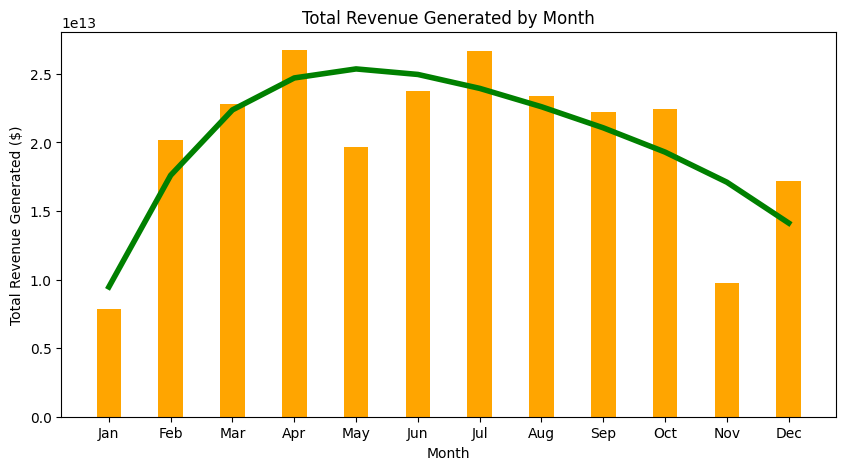

In [ ]:
# Bar Graph for Total Value of All Sales by Month

# Polynomial Trend Line
value_trend = np.poly1d(np.polyfit(x_num, p['Value'], 4))

plt.figure(figsize = (10, 5))

plt.bar(p.index, p['Value'], width, label = 'Total Revenue Generated', color = 'orange')
plt.plot(p.index, value_trend(x_num), color = 'green', linestyle = '-', linewidth = 4, label = 'Trendline')
plt.xticks(p.index)
plt.title('Total Revenue Generated by Month')
plt.xlabel('Month')
plt.ylabel('Total Revenue Generated ($)')
plt.show()

*   Highest Sales were Recorded in April (Spring Break time) and the Summer Months (June and July) and Months with a lot of Festive Activities/Sales like October (Halloween) and December (End of Year's & Christmas Sales)
*   Average Weekly Sales painted a different picture, with the Highest Aggregate Revenue Months not Ranking as High in Average Weekly Sales but some Months of Lower Overall Revenue Ranking High in Weekly Sales (e.g., November and January).
This might be due to these Months containing certain periods (i.e., Weeks) of Sales, like November's *Black Friday* deals' Week.



,Weekly_Sales_Mean,Normalized_Sales_Change_To_Next_Month (%)
Month,,
Jan,14126.075111,13.33
Feb,16008.779217,-3.70
Mar,15416.657597,1.52
Apr,15650.338357,0.81
May,15776.337202,3.48
Jun,16326.137002,-2.85
Jul,15861.419650,1.27
Aug,16062.516933,-6.02
Sep,15095.886154,0.98


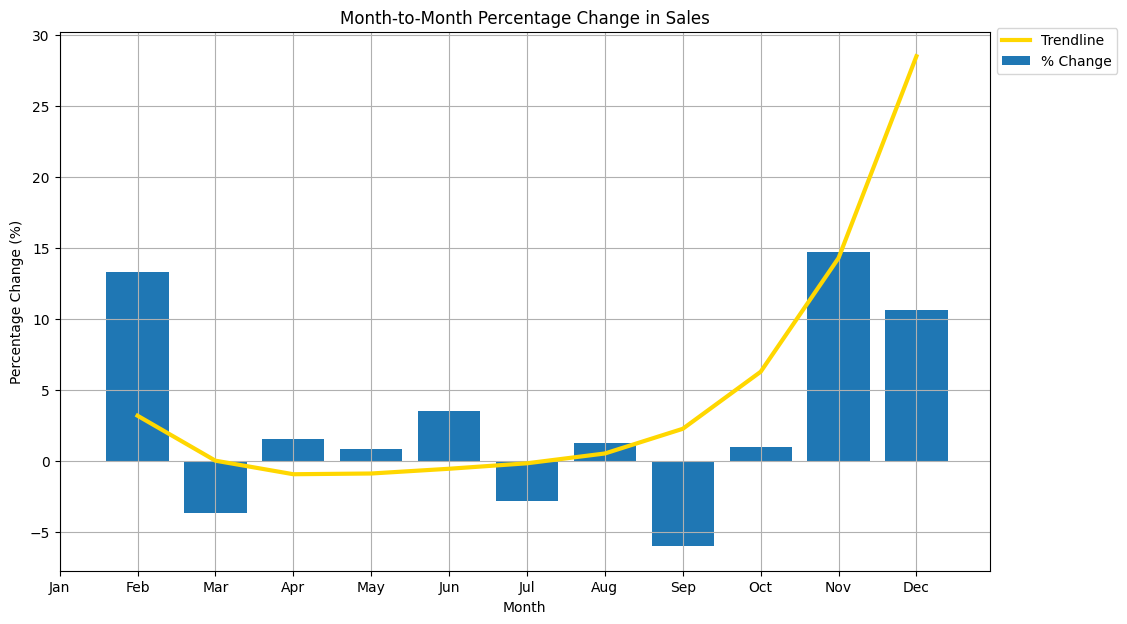

In [ ]:
# % Growth/Decline of Current Month Compared to Previous Month
p['Normalized_Sales_Change_To_Next_Month (%)'] = round(((p['Weekly_Sales_Mean'].shift(-1) - p['Weekly_Sales_Mean']) / p['Weekly_Sales_Mean'])*100, 2)

display(p[['Weekly_Sales_Mean', 'Normalized_Sales_Change_To_Next_Month (%)']])

# Visualizing it
x_num = np.arange(len(p.index))
perc_trend = np.poly1d(np.polyfit(x_num[:-1], p['Normalized_Sales_Change_To_Next_Month (%)'].dropna(), 4)) # Ecluding Last Month (Dec), which was NA

plt.figure(figsize = (12, 7))
plt.bar(p.index, p['Normalized_Sales_Change_To_Next_Month (%)'].shift(1), linestyle = '-', label = '% Change') # Actual % Change from Previous Month
plt.plot(p.index[1:], perc_trend(x_num[1:]), color = 'gold', linestyle = '-', linewidth = 3, label = 'Trendline') # Trend Line
plt.xticks(p.index)
plt.title('Month-to-Month Percentage Change in Sales')
plt.xlabel('Month')
plt.ylabel('Percentage Change (%)')
plt.legend(bbox_to_anchor = (1, 1.02))
plt.grid(True)
plt.show()

*   HUGE Jump in Sales From January to February!
*   Sales Have Only Increase from Sept-onwards, and November and December had the Highest Sales Increases along with February.
*   April, June, and July had the Highest Recorded Revenues and Numbers of Products Purchased, but do not induce Incredible Increases/Decreases in Customer Purchasing Behavior (Sales Actually *Declined* a bit from June to July).

---


*   I am Very Confident in Concluding that November and December would have Easily been the Months producing the most Revenue, had there been more Recordings of Purchases during these Months. Evidence: Highest Average Sales in these Months, Higher Customer Purchasing Behavior Increases in these Months, DESPITE lower Count of Purchases.
*   April, June, and July would also still Remain among the Top most-Revenue-Generating Months of the Year, Evidenced by their High Amounts of Average Sales.

In [ ]:
# Detailed Distribution of Key Metrics by Crucial Grouper Values (Store Size Category, Month of the Year)

df['Discount'] = df[['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']].mean(axis = 1).round(2)

# Group by Store_Size_Category and Month
grouped_df = df.groupby(['Store_Size_Category', 'Month'])

# Calculating Quantiles for Specified columns within Each Group
df_quantiles = grouped_df[['Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Weekly_Sales', 'Discount']].quantile([0.25, 0.5, 0.75, 0.99]).round(2)

display(df_quantiles)

Temperature  Fuel_Price     CPI  Unemployment  \
Store_Size_Category Month                                                       
Small               Jan   0.25        32.71        3.00  130.28          6.83   
                          0.50        48.07        3.10  196.83          7.55   
                          0.75        53.53        3.29  214.70          8.74   
                          0.99        62.73        3.68  223.56         14.02   
                    Feb   0.25        33.17        2.67  130.45          7.04   
                          0.50        47.07        3.04  196.95          8.03   
                          0.75        54.49        3.38  212.90          8.95   
                          0.99        67.73        3.95  223.92         14.02   
                    Mar   0.25        44.69        2.92  130.83          7.04   
                          0.50        57.62        3.46  197.41          8.03   
                          0.75        64.00        3.73  214.32          8.82   
                          0.99        72.72        4.29  224.79         14.02   
                    Apr   0.25        50.39        2.84  131.11          6.89   
                          0.50        66.97        3.66  197.78          7.97   
                          0.75        70.87        3.88  214.03          8.69   
                          0.99        80.11        4.28  225.07         14.10   
                    May   0.25        56.74        2.96  131.10          6.84   
                          0.50        73.70        3.75  197.61          7.93   
                          0.75        77.38        3.90  214.52          8.69   
                          0.99        88.89        4.31  225.25         14.10   
                    Jun   0.25        68.84        2.94  130.83          6.84   
                          0.50        82.41        3.59  197.79          7.93   
                          0.75        85.94        3.74  214.70          8.69   
                          0.99        95.75        4.28  225.31         14.10   
                    Jul   0.25        78.15        2.80  130.70          6.56   
                          0.50        83.43        3.48  197.98          7.85   
                          0.75        87.57        3.61  214.42          8.62   
                          0.99        99.22        3.84  225.44         14.18   
                    Aug   0.25        77.72        3.04  130.79          6.56   
                          0.50        85.89        3.54  198.10          7.80   
                          0.75        88.83        3.64  214.97          8.62   
                          0.99        99.66        4.06  225.69         14.18   
                    Sep   0.25        67.96        2.94  130.98          6.56   
                          0.50        79.17        3.55  198.59          7.85   
                          0.75        83.12        3.72  215.12          8.62   
                          0.99        96.22        4.12  226.32         14.18   
                    Oct   0.25        56.89        2.76  131.11          6.30   
                          0.50        69.79        3.37  199.22          7.56   
                          0.75        73.05        3.62  215.78          8.51   
                          0.99        86.01        4.47  226.97         14.31   
                    Nov   0.25        42.55        2.74  129.83          7.20   
                          0.50        58.71        3.18  195.77          7.87   
                          0.75        62.72        3.42  215.06          9.00   
                          0.99        71.91        3.83  221.90         14.31   
                    Dec   0.25        32.46        2.87  129.98          7.20   
                          0.50        48.63        3.12  196.36          7.87   
                          0.75        53.18        3.17  214.70          9.00   
                          0.99        60.72        3.70  222.83

In [ ]:
df_grouped_mean.quantile

,0.25
Temperature,43.5275
Fuel_Price,3.2400
CPI,153.1075
Unemployment,7.8675
Weekly_Sales,13252.7025
Discount,2527.0050
